# Assignment 1

In [13]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 6.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
def load_image(path):
    return plt.imread(path)

## Problem 1: Getting to know Python (5 Points)

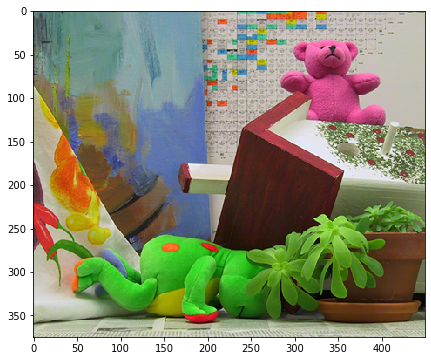

In [15]:
from problem1 import *

img = load_image("data/a1p1.png")
display_image(img)

save_as_npy("a1p1.npy", img)

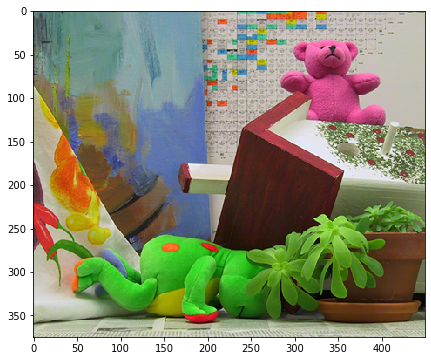

In [16]:
img1 = load_npy("a1p1.npy")
display_image(img1)

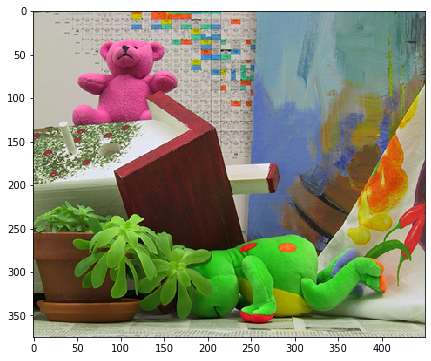

In [19]:
img2 = mirror_horizontal(img1)
display_image(img2)

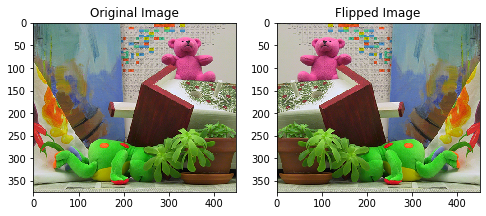

In [25]:
display_images(img1, img2)

## Problem 2: Bayer Interpolation (10 Points)

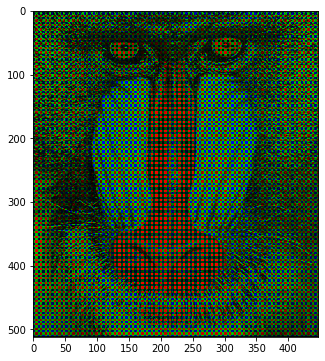

In [34]:
from problem2 import *

data = loaddata("data/bayerdata.npy")
r, g, b = separatechannels(data)

img = assembleimage(r, g, b)
display_image(img)

In [ ]:
img_interpolated = interpolate(r, g, b)
display_image(img_interpolated)

## Problem 3: Projective Transformation (10 Points)

## Problem 4: Image Filtering and Edge Detection (15 Points)